# Dataset construction

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

## "Most popular meme templates of 2018" exploration and analysis

Let's load the metadata table of the first and best meme dataset:

In [125]:
most_pop_df = pd.read_csv("./data/Most popular memes templates of 2018/reddit_posts.csv", usecols=["meme_id", "meme_template", "subreddit", "title"])
most_pop_df

,meme_id,meme_template,subreddit,title
0,001i5ooagzm11_redt,that_wasnt_very_cash_money,dankmemes,Mods have the i n f i n i t e gay
1,002fmrbao0z01_redt,is_this_a_pigeon,teenagers,Its sad cause its true
2,007ss62yk9u11_redt,elmo_shock,dankmemes,I\'m gonna say the f word
3,008bi38hvqh11_redt,stefan_pref,dankmemes,"He taught us to respect others, even when they..."
4,00AYm2p_imgr,10_guy,AdviceAnimals,I asked my roommate where all the clean dishes...
...,...,...,...,...
43725,zzs9f2okk8d11_redt,thor_defeat,Memes_Of_The_Dank,Her worst enemy
43726,zzscavoq6p311_redt,socially_awesome_awkward_penguin,AdviceAnimals,Didn\'t look around for even a second.
43727,zzty3zka0s611_redt,the_scroll_of_truth,bonehurtingjuice,Loss are getting weirder these days
43728,zzxq4uo1bn221_redt,steve_harvey_conflicted,me_irl,me irl


Now, let's check the subreddits distribution that could be used as labels/categories for the memes:

In [4]:
most_pop_df['subreddit'].value_counts()

AdviceAnimals            9504
dankmemes                6902
memes                    4682
me_irl                   3265
teenagers                3234
bonehurtingjuice         2674
dankchristianmemes       1559
Memes_Of_The_Dank        1278
wholesomememes           1165
PewdiepieSubmissions     1145
traaaaaaannnnnnnnnns     1122
HistoryMemes              902
PrequelMemes              665
Animemes                  592
SequelMemes               534
dank_meme                 487
DankMemesFromSite19       417
zuckmemes                 374
trebuchetmemes            331
antimeme                  279
pcmasterrace              235
lotrmemes                 225
BikiniBottomTwitter       215
OTMemes                   192
DeepFriedMemes            172
funny                     171
ComedyCemetery            170
2meirl4meirl              170
marvelmemes               155
FellowKids                147
terriblefacebookmemes     132
TooMeIrlForMeIrl          128
GarlicBreadMemes          121
Gamingcirc

Even as a seasoned redditor, I still have to check what some of these subreddits are to understand if they could be used as categories/topics. Let's make a function to show a few memes of a given subreddit.

In [115]:
from random import sample

def show_meme_sample(df:pd.DataFrame, subreddit_label:str, n:int=6):
    df_sample = df[df["subreddit"] == subreddit_label][["meme_id", "url", "title"]].sample(n)
    
    rows = int(n/3+int(bool(n%3))) # This might be stupid, but I didn't want to import numpy to compute the ceiling
    fig, axs = plt.subplots(rows, 3, figsize=(6*3, 4*rows))
    plt.tight_layout()
    
    cnt = 0
    for i in df_sample.index:
        fname = df_sample.loc[[i], ["meme_id"]].values[0][0]
        try:
            img = Image.open(f"./data/Most popular memes templates of 2018/images/kaggle_images/{fname}.jpg")
        except FileNotFoundError:
            img = Image.open(f"./data/Most popular memes templates of 2018/images/kaggle_images/{fname}.png")
        except Exception:
            print(f"file {fname} not found with extensions .jpg or .png")
        img = np.array(img)
        axs[cnt//3, cnt%3].set_xticks([])
        axs[cnt//3, cnt%3].set_yticks([])
        axs[cnt//3, cnt%3].set_title(df_sample.loc[[i], ["title"]].values[0][0], {'fontsize': 10})
        axs[cnt//3, cnt%3].imshow(img)
        cnt += 1
        
    plt.show()

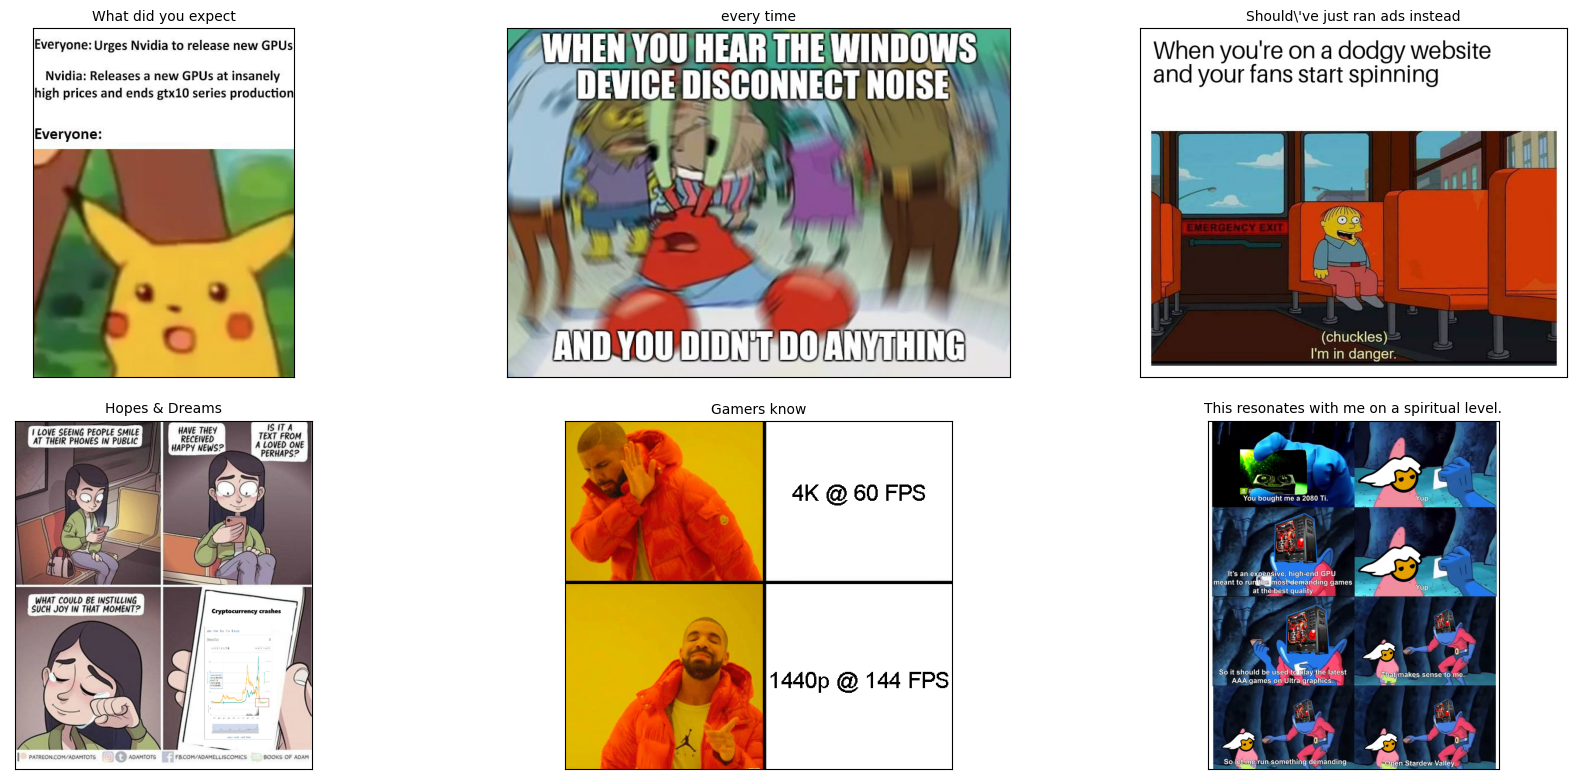

In [123]:
show_meme_sample(most_pop_df, "pcmasterrace")

Some manual findings about the subreddits:
- AdviceAnimals seems not to focus on any specific topic in particular, ranging from lifestyle to politics to other random subjects
- teenagers seems quite focused on teenagers' feelings and school, maybe it could be used as a "Youth" category
- bonehurtingjuice seems to produce dry humor style memes, not really focusing on a specific topic
- dankchristianmemes seems a perfect subreddit for a "religion" or "christianity" category
- HistoryMemes seems perfect for a "history" category
- PrequelMemes contains memes of the Star Wars prequels (maybe they could fit in a Star Wars category)
- Animemes is a subreddit with anime memes, could be used for an "Anime" category
- SequelMemes is another subreddit about Star Wars, could be used together with PrequelMemes for the "Star Wars" category
- pcmasterrace is a subreddit about PC gaming memes. It doesn't have as many entries as the subreddits above but it could potentially be used as a category ("gaming" or perhaps a more general "consumer electronics")

## Selection of rows of interest (subreddits) in the dataset

In [128]:
subreddits_to_categories = {
    "teenagers": "Youth", 
    "dankchristianmemes": "Religion", 
    "HistoryMemes": "History",
    "PrequelMemes": "Star Wars",
    "SequelMemes": "Star Wars",
    "Animemes": "Anime",
    "pcmasterrace": "Consumer Electronics",
}
df = most_pop_df.loc[most_pop_df["subreddit"].isin(subreddits_to_categories.keys())]
df

,meme_id,meme_template,subreddit,title
1,002fmrbao0z01_redt,is_this_a_pigeon,teenagers,Its sad cause its true
5,00b0vhbrflr11_redt,drake_pref,teenagers,Just took a test so heres a midday meme
8,00d0wg7wjfm01_redt,gru_flipchart,dankchristianmemes,Saul\'s logic
11,00exuutugwd11_redt,change_my_mind,teenagers,*recycled caption*
25,00v6mkh201521_redt,coffins,teenagers,Every class has one
...,...,...,...,...
43694,zyrkrfjj41v01_redt,i_miss_the_internet,Animemes,My waifu is the only reason why i\'m alive
43698,zyuiar4o6s421_redt,domino_effect,teenagers,Basically the last century
43705,zz68n4z65lr11_redt,fallout_wtf,HistoryMemes,Excuse me
43710,zzard03whas11_redt,chuck_e_cheese_rat,HistoryMemes,BuT tAkInG mOsCoW mEaNs I wIn


In [140]:
category_column = []
for sub in df["subreddit"]:
    category_column.append(subreddits_to_categories[sub])

df.insert(3, "category", category_column)
df = df.reset_index(drop=True)
df

,meme_id,meme_template,subreddit,category,title
0,002fmrbao0z01_redt,is_this_a_pigeon,teenagers,Youth,Its sad cause its true
1,00b0vhbrflr11_redt,drake_pref,teenagers,Youth,Just took a test so heres a midday meme
2,00d0wg7wjfm01_redt,gru_flipchart,dankchristianmemes,Religion,Saul\'s logic
3,00exuutugwd11_redt,change_my_mind,teenagers,Youth,*recycled caption*
4,00v6mkh201521_redt,coffins,teenagers,Youth,Every class has one
...,...,...,...,...,...
7716,zyrkrfjj41v01_redt,i_miss_the_internet,Animemes,Anime,My waifu is the only reason why i\'m alive
7717,zyuiar4o6s421_redt,domino_effect,teenagers,Youth,Basically the last century
7718,zz68n4z65lr11_redt,fallout_wtf,HistoryMemes,History,Excuse me
7719,zzard03whas11_redt,chuck_e_cheese_rat,HistoryMemes,History,BuT tAkInG mOsCoW mEaNs I wIn


## Dataset memes transcription with Tesseract

In [ ]:
transcriptions = []

In [179]:
from asyncio import base_subprocess
import ocr_text_extraction as ocr
from importlib import reload
import os
reload(ocr)

# transcriptions = []

for row in df.index:
    if transcriptions[row] != "?":
        continue
    fname = df.loc[row, "meme_id"]
    base_path = "./data/Most popular memes templates of 2018/images/kaggle_images/"
    
    extensions = [".jpg", ".png", ".gif"]
    found = False
    for ext in extensions:
        path = base_path + fname + ext
        
        if os.path.isfile(path):
            found = True
            break
    
    if not found:
        print(f"file {fname} not found with extensions .jpg .png or .gif")
        transcriptions.append("?")
    else:        
        try:
            transcriptions.append(ocr.extract_text_wprocessing(path))
        except Exception:
            print(f"Something wrong with row {row}")
            transcriptions.append("?")
    
    # Print progress
    print(f"Processing... [{row}/{df.shape[0]}]", end='\r')

# df.insert(4, "transcription", transcriptions)
df["transcription"] = transcriptions
df.to_csv("./data/working_dataset.csv")

Something wrong with row 1443
Something wrong with row 2484
Something wrong with row 2565
Something wrong with row 2701
Something wrong with row 3024
Something wrong with row 3037
Something wrong with row 3567
Something wrong with row 3614
Something wrong with row 3807
Something wrong with row 4436
Something wrong with row 4683
Something wrong with row 5299
Something wrong with row 5712
Something wrong with row 6583
Something wrong with row 6872
Something wrong with row 6970
Something wrong with row 7036
Something wrong with row 7367
Something wrong with row 7453


ValueError: Length of values (12879) does not match length of index (7721)

In [174]:
import os


# df.insert(4, "transcription", transcriptions)
# df.to_csv("./data/working_dataset.csv")
os.path.isfile("./data/Most popular memes templates of 2018/images/kaggle_images/b6g16vaidny11_redt.gif")

True

In [177]:
df

,meme_id,meme_template,subreddit,category,transcription,title
0,002fmrbao0z01_redt,is_this_a_pigeon,teenagers,Youth,"[Angry, teenagers, Adults, caused, by, gaming?]",Its sad cause its true
1,00b0vhbrflr11_redt,drake_pref,teenagers,Youth,"[Being, the, first, person, to, turn, a, test,...",Just took a test so heres a midday meme
2,00d0wg7wjfm01_redt,gru_flipchart,dankchristianmemes,Religion,"[Find, the, Kill, the, Christians, Christians,...",Saul\'s logic
3,00exuutugwd11_redt,change_my_mind,teenagers,Youth,"[et, Toc, uss, ooycny, CARRY, ANY, ua, Mf, A, ...",*recycled caption*
4,00v6mkh201521_redt,coffins,teenagers,Youth,"[Good, students, Bad, students, ae, ry, erent,...",Every class has one
...,...,...,...,...,...,...
7716,zyrkrfjj41v01_redt,i_miss_the_internet,Animemes,Anime,?,My waifu is the only reason why i\'m alive
7717,zyuiar4o6s421_redt,domino_effect,teenagers,Youth,?,Basically the last century
7718,zz68n4z65lr11_redt,fallout_wtf,HistoryMemes,History,?,Excuse me
7719,zzard03whas11_redt,chuck_e_cheese_rat,HistoryMemes,History,?,BuT tAkInG mOsCoW mEaNs I wIn
